<a href="https://colab.research.google.com/github/dolmani38/concept_drift/blob/main/synthetic_data_generation_0115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
if True:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
def seed_everything(seed: int = 46):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

# rule을 바꾼 concept drift...

In [15]:
import random

data_x = {}
weight = {}
errors = []
for f in range(10):
    data_x[f'x{f}'] = []
    weight[f'w{f}'] = []
    d1 = random.uniform(0.5, 10.0)
    d2 = random.uniform(0.0, 0.001)
    d3 = random.uniform(0.0, 0.003)
    w = random.uniform(0, 5)
    w_delta = random.uniform(-0.003, 0.001)
    for i in range(1000):
        for j in range(10):
            data_x[f'x{f}'].extend(np.random.normal(d1+(i*d2),2.0+(i*d3),100))
            weight[f'w{f}'].extend(w + (w_delta*i)+np.random.normal(0.0,0.01,100))
            #weight[f'w{f}'].extend(w + np.random.normal(0.0,0.01,100))

for i in range(10000):        
    errors.extend(np.random.normal(1.0,10.0,100))

dataset = pd.DataFrame(data_x)
importance = pd.DataFrame(weight)

y=np.sum(np.multiply(importance.values,dataset.values),axis=1) + np.asarray(errors)

AttributeError: ignored

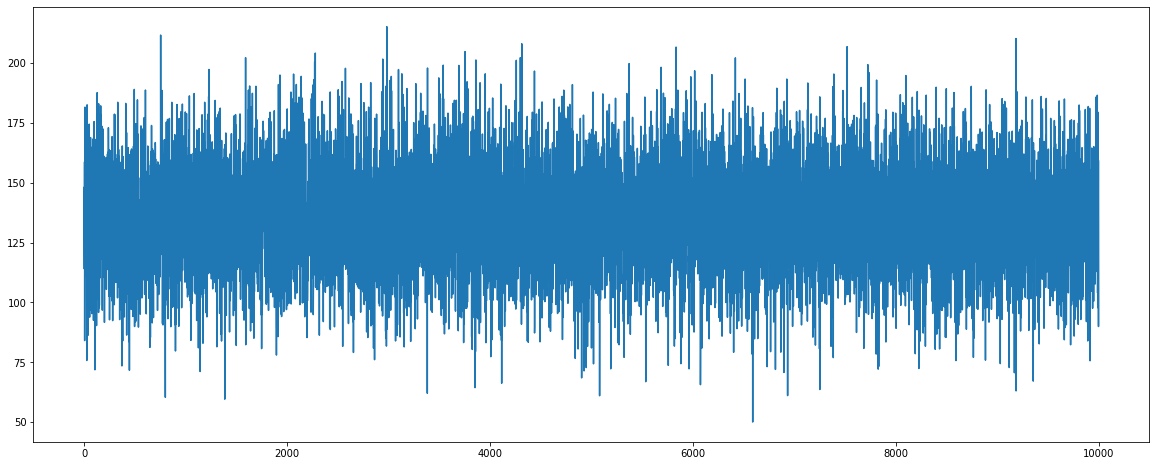

In [16]:
plt.figure(figsize=(20,8))
plt.plot(y[0:10000])

In [17]:
dataset['y'] = [1 if i > 110 else 0 for i in y]

In [46]:
# 여기서 rule을 중간에 바꾸어서 concept drift 유도한다.
dataset[600000:]['y'] = [1 if i > 120 else 0 for i in y[600000:]]

<ipython-input-46-4a455d376917>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[600000:]['y'] = [1 if i > 120 else 0 for i in y[600000:]]


In [47]:
dataset

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
0,1.578361,4.813081,7.045175,3.727827,6.330014,3.230801,0.504368,7.836999,4.647692,5.346435,1
1,4.587308,6.313894,5.872473,1.108996,5.233947,2.461960,0.890634,9.650874,-0.860432,7.898705,1
2,3.518010,5.442291,5.671227,0.773242,5.552341,3.680384,2.566781,6.909114,3.550809,7.337578,1
3,1.462176,2.213567,7.052875,0.538457,6.997339,3.645502,1.963912,6.993451,1.576308,11.274259,1
4,5.523799,8.099743,5.487423,1.351743,4.883955,5.118612,2.140383,4.504221,4.960967,7.984281,1
...,...,...,...,...,...,...,...,...,...,...,...
999995,7.868040,1.577744,12.003155,0.654864,3.963991,2.310243,2.872356,14.829761,7.945905,9.174745,0
999996,3.484118,2.416136,4.151975,6.631453,13.398079,9.883288,0.588962,9.979410,-0.469033,3.545257,0
999997,4.542066,4.789517,6.466952,-3.390972,5.852276,-0.240896,5.024527,10.517811,6.029777,9.083336,0
999998,4.248721,3.488866,11.375172,2.307104,7.185485,5.990345,6.956642,7.127502,4.496493,13.234201,0


In [19]:
dataset.to_csv('/content/drive/MyDrive/laos/synthetic_dataset_2_0115.csv')

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
trainset = dataset[0:10000].drop(columns=['y']).values
train_y = dataset[0:10000]['y'].values

In [35]:
business_model = RandomForestClassifier(n_estimators=80,max_depth=5)
business_model.fit(trainset,train_y)

RandomForestClassifier(max_depth=5, n_estimators=80)

In [36]:
testset = dataset[10000:14000].drop(columns=['y']).values
test_y = dataset[10000:14000]['y'].values

In [37]:
from sklearn.metrics import precision_recall_fscore_support

base_score = precision_recall_fscore_support(test_y, business_model.predict(testset),average='binary')

In [38]:
base_score

(0.8837033299697276, 0.9988594240091246, 0.9377593360995851, None)

In [40]:

def __ks_2samp2(sample1, sample2):
    # Gets all observations
    sample1 = np.sort(sample1)
    sample2 = np.sort(sample2)
    n1 = sample1.shape[0]
    n2 = sample2.shape[0]   
    data_all = np.concatenate([sample1, sample2])
    cdf1 = np.searchsorted(sample1, data_all, side='right') / n1
    cdf2 = np.searchsorted(sample2, data_all, side='right') / n2
    # Evaluates the KS statistic
    cddiffs = cdf1 - cdf2
    minS = -np.min(cddiffs)
    maxS = np.max(cddiffs)
    ks_stat =  max(minS, maxS)
    
    #if ks_stat == minS:
    #    ks_stat = -ks_stat
    
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    m, n = float(n1), float(n2)
    en = m * n / (m + n)
    p_value = 0.0 #stats.kstwobign.sf(math.sqrt(en) * abs(ks_stat))
    #p_value = stats.kstwobign.sf(en * abs(ks_stat))
    return ks_stat,p_value

def __ks_drift(ref_x,inf_x):
    x_drift = np.zeros((ref_x.shape[1],2))
    for i in range(ref_x.shape[1]):
        #s, p = ks_2samp(ref_x[:,i],inf_x[:,i],mode='asymp')
        s, p = __ks_2samp2(ref_x[:,i],inf_x[:,i])
        x_drift[i,0] = s
        x_drift[i,1] = p
    return x_drift

In [41]:
X2 = dataset[14000:].drop(columns=['y']).values
Y2 = dataset[14000:]['y'].values

In [48]:
import math

result = {}
result['precision'] = []
result['predicted'] = []
result['drift'] = []
window_size = 10000
step = 5000
predicted = 0
batch = math.ceil((X2.shape[0]-window_size)/step)
for i in range(batch):
    ux = X2[i*step:i*step+window_size]
    uy = Y2[i*step:i*step+window_size]
    f1 = precision_recall_fscore_support(uy, business_model.predict(ux),average='binary')
    drift = __ks_drift(trainset,ux)
    result['precision'].append(f1[0])
    result['predicted'].append(0.0)
    result['drift'].append(sum(abs(drift[:,0])))

In [49]:
result_df = pd.DataFrame(result)

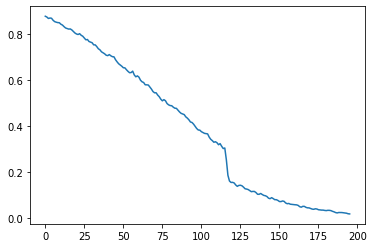

In [50]:
result_df['precision'].plot()

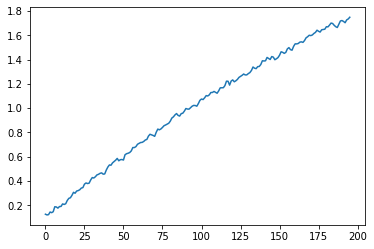

In [51]:
result_df['drift'].plot()

## 여기서, MI를 측정한다.

In [52]:

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

  feature  importance
0      x1    0.040013
1      x3    0.028044
2      x9    0.024848
3      x8    0.021098
4      x2    0.013340
5      x7    0.008911
6      x0    0.008293
7      x4    0.000893
8      x5    0.000000
9      x6    0.000000


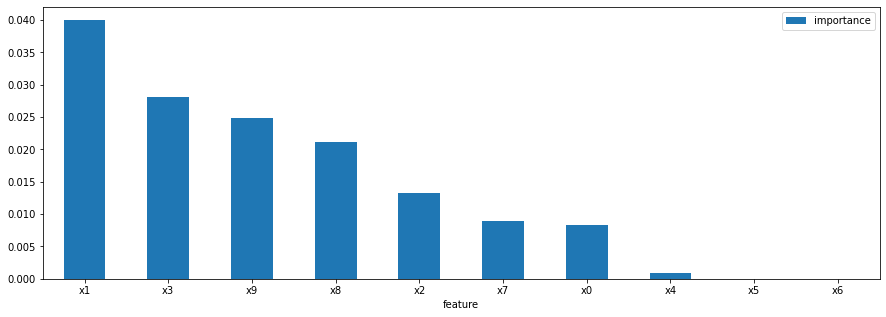

In [54]:
COLUMNS = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9']
mi_scores = make_mi_scores(pd.DataFrame(trainset,columns=COLUMNS), train_y, discrete_features="auto")
imp_df_mi = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))

imp_df3 = pd.DataFrame({'feature':mi_scores.keys()[:10],'importance':mi_scores.values[:10]})
print(imp_df3)
imp_df3.plot.bar(x='feature',rot=0,figsize=(15,5))

In [62]:
import math

result = {}
result['precision'] = []
result['predicted'] = []
result['drift'] = []

#MI
mi_scores = make_mi_scores(pd.DataFrame(trainset,columns=COLUMNS), train_y, discrete_features="auto")
imp_df_mi = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
imp_df_mi2 = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
window_size = 10000
step = 5000
predicted = 0
batch = math.ceil((X2.shape[0]-window_size)/step)
for i in range(batch):
    ux = X2[i*step:i*step+window_size]
    uy = Y2[i*step:i*step+window_size]
    y_ = business_model.predict(ux)
    f1 = precision_recall_fscore_support(uy,y_ ,average='binary')
    drift = __ks_drift(trainset,ux)
    result['precision'].append(f1[0])
    result['predicted'].append(0.0)
    result['drift'].append(sum(abs(drift[:,0])))
    #MI
    mi_scores = make_mi_scores(pd.DataFrame(ux,columns=COLUMNS), uy, discrete_features="auto")
    tmp_df = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
    imp_df_mi.loc[len(imp_df_mi)] = tmp_df.values.reshape(-1,)

    mi_scores = make_mi_scores(pd.DataFrame(ux,columns=COLUMNS), y_, discrete_features="auto")
    tmp_df = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
    imp_df_mi2.loc[len(imp_df_mi)] = tmp_df.values.reshape(-1,)

    print(f"\r{i+1}/{batch} f1:{f1[0]:.4f}", end="", flush=True)


196/196 f1:0.0179

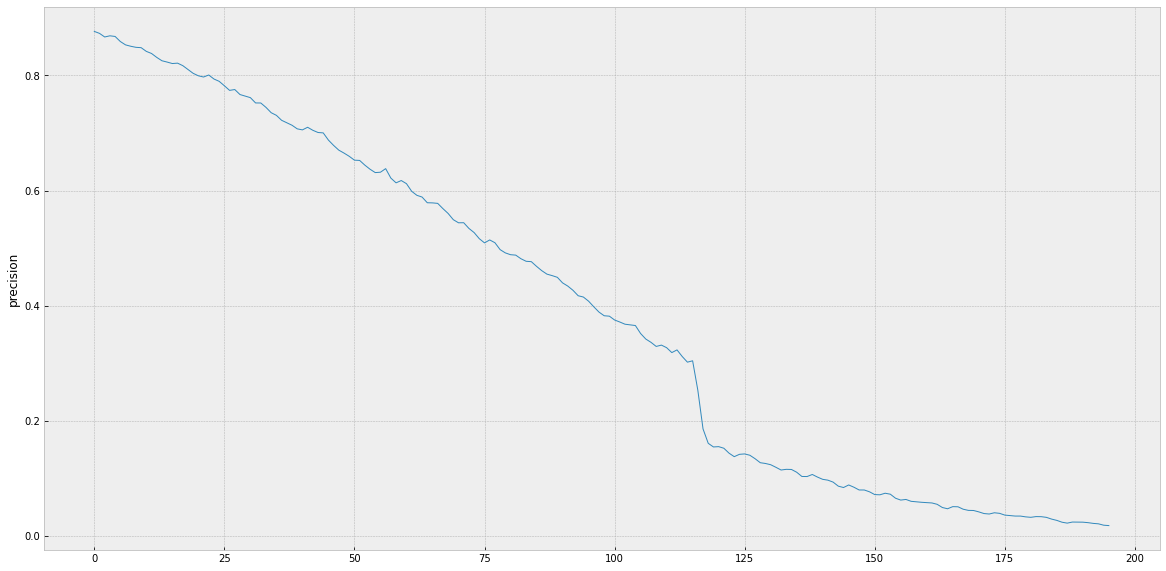

In [63]:
plt.style.use('bmh')

result_df = pd.DataFrame(result)
result_df['precision'].plot(ylabel='precision',linewidth=1,figsize=(20,10))

[]

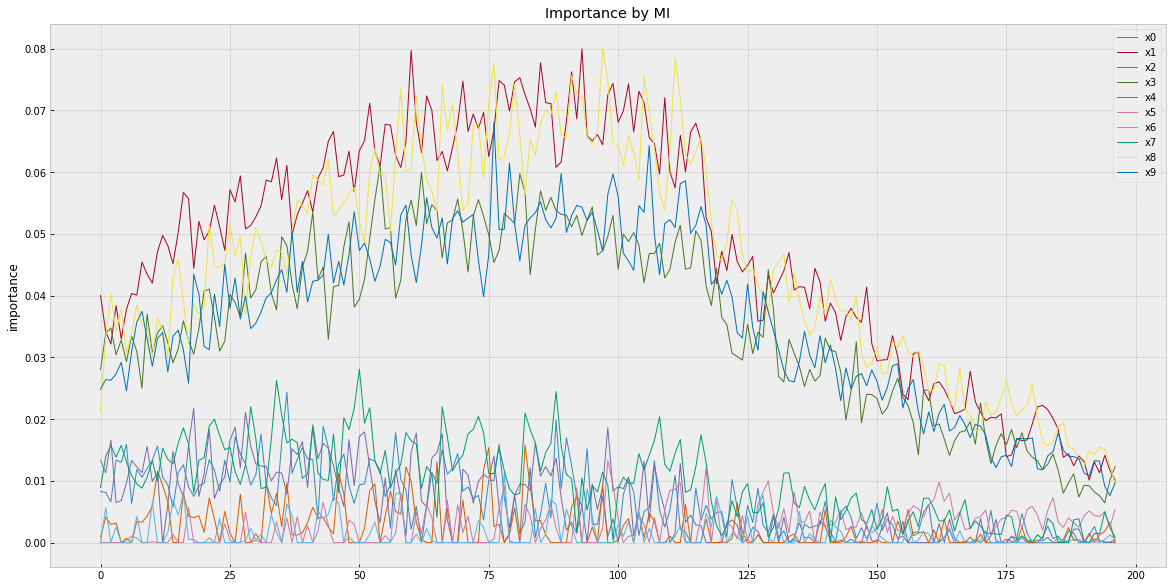

In [64]:
ax = imp_df_mi.plot(ylabel='importance',linewidth=1,figsize=(20,10),legend=True)
ax.set_title("Importance by MI",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

[]

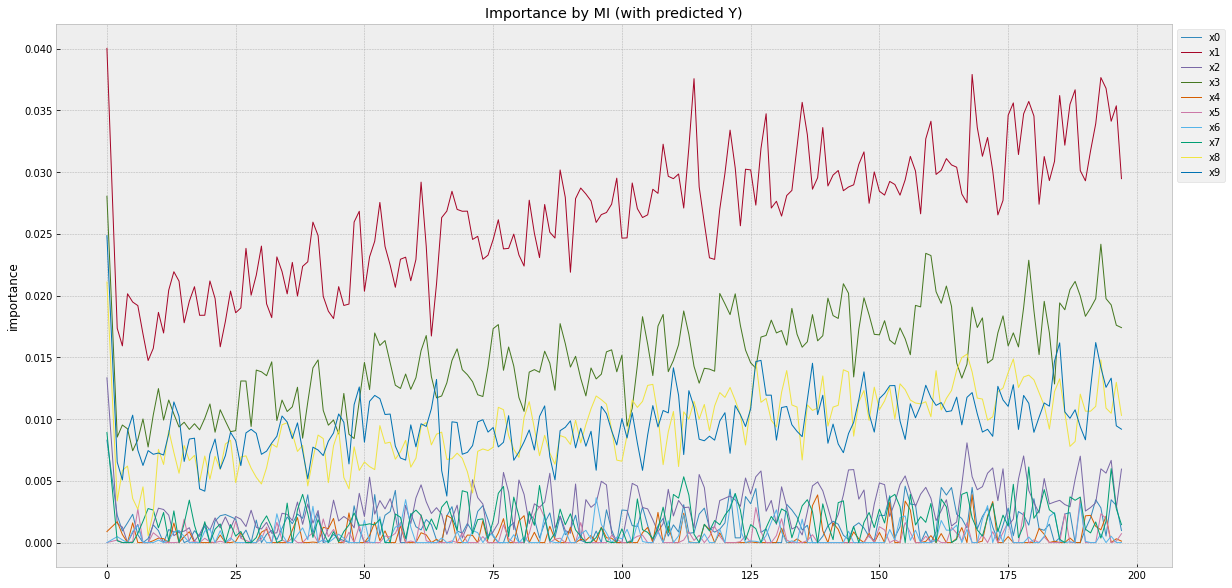

In [65]:
ax = imp_df_mi2.plot(ylabel='importance',linewidth=1,figsize=(20,10),legend=True)
ax.set_title("Importance by MI (with predicted Y)",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

### 결론

rule을 바꾼 concept drift는 MI에서 변화를 감지 할 수 없다... 당연한거 아님!!!

# weight를 흔든 concept drift

In [123]:
import random

data_x = {}
weight = {}
errors = []
for f in range(10):
    data_x[f'x{f}'] = []
    weight[f'w{f}'] = []
    d1 = random.uniform(0.5, 10.0)
    d2 = random.uniform(0.0, 0.001)
    d3 = random.uniform(0.0, 0.003)
    w = random.uniform(0, 5)
    w_delta = random.uniform(-0.003, 0.001)
    for i in range(1000):
        for j in range(10):
            data_x[f'x{f}'].extend(np.random.normal(d1+(i*d2),2.0+(i*d3),100))
            # 중간에 weight를 흔들어서, concept drift를 유도 한다???
            if i > 500 and (f==0 or f==5):
                weight[f'w{f}'].extend(w + (w_delta*2*i)+np.random.normal(0.0,0.01,100))
            else:
                weight[f'w{f}'].extend(w + (w_delta*i)+np.random.normal(0.0,0.01,100))
            #weight[f'w{f}'].extend(w + np.random.normal(0.0,0.01,100))

for i in range(10000):        
    errors.extend(np.random.normal(1.0,10.0,100))

dataset = pd.DataFrame(data_x)
importance = pd.DataFrame(weight)

y=np.sum(np.multiply(importance.values,dataset.values),axis=1) + np.asarray(errors)

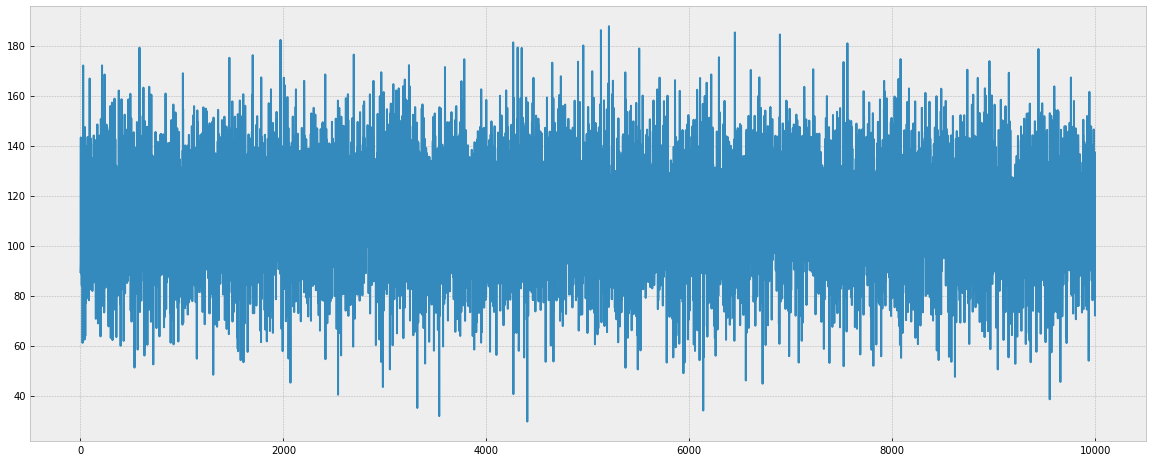

In [124]:
plt.figure(figsize=(20,8))
plt.plot(y[0:10000])

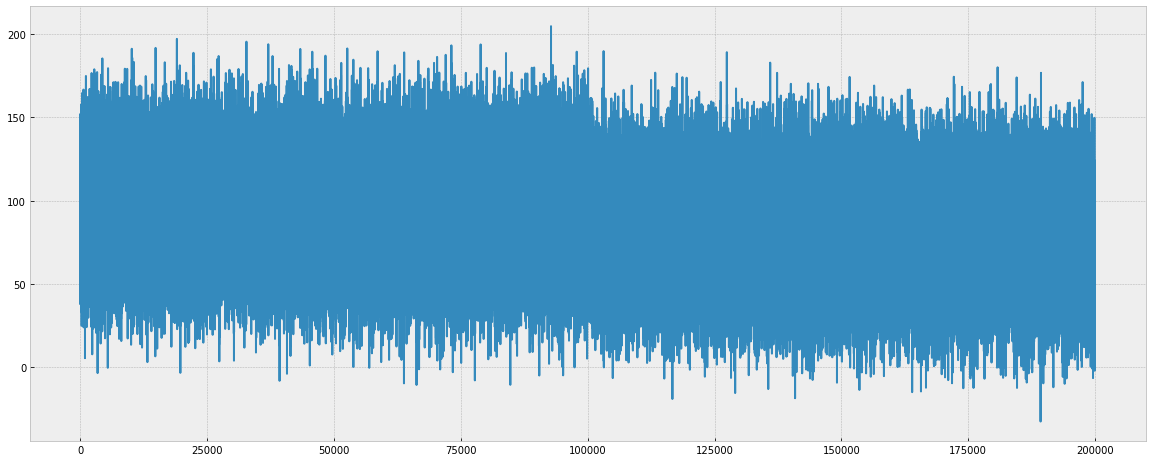

In [125]:
plt.figure(figsize=(20,8))
plt.plot(y[400000:600000])

In [133]:
dataset['y'] = [1 if i > 130 else 0 for i in y]

In [134]:
dataset

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
0,4.130987,3.746774,2.776188,3.420008,3.991713,6.311531,2.471309,0.479664,6.583811,1.817973,0
1,5.016384,0.263917,3.432135,5.991731,0.547417,5.873182,2.912607,3.921781,8.553825,0.623239,0
2,6.511107,4.034170,1.396960,7.679635,2.754959,8.340818,0.229439,4.190660,4.031463,-1.819374,0
3,8.983112,-0.618317,8.795512,7.928967,4.447994,7.882627,-0.829402,5.237798,6.794348,3.261699,0
4,7.089550,2.168253,3.482959,5.226237,-0.850145,8.792357,4.184880,2.071320,7.845928,4.868111,1
...,...,...,...,...,...,...,...,...,...,...,...
999995,5.854541,-9.829473,8.115833,-1.803812,0.316848,4.648225,-0.100287,5.082520,7.996425,2.022376,0
999996,2.676089,9.261044,-0.328978,12.015063,-1.423270,4.741545,5.410296,3.573124,5.259837,9.598044,0
999997,5.092288,1.564597,-0.953403,7.451178,2.995592,0.811660,-0.028310,1.904221,7.199882,-0.707557,0
999998,6.724643,5.994421,-0.858411,2.480255,4.642103,10.164066,-3.942725,3.458798,4.811888,3.114939,0


In [135]:
trainset = dataset[0:10000].drop(columns=['y']).values
train_y = dataset[0:10000]['y'].values
business_model = RandomForestClassifier(n_estimators=80,max_depth=5)
business_model.fit(trainset,train_y)
testset = dataset[10000:14000].drop(columns=['y']).values
test_y = dataset[10000:14000]['y'].values
base_score = precision_recall_fscore_support(test_y, business_model.predict(testset),average='binary')
base_score

(0.8461538461538461, 0.2746566791510612, 0.4147031102733271, None)

In [136]:
X2 = dataset[14000:].drop(columns=['y']).values
Y2 = dataset[14000:]['y'].values

In [137]:
import math

result = {}
result['precision'] = []
result['predicted'] = []
result['drift'] = []

#MI
mi_scores = make_mi_scores(pd.DataFrame(trainset,columns=COLUMNS), train_y, discrete_features="auto")
imp_df_mi = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
imp_df_mi2 = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
window_size = 10000
step = 5000
predicted = 0
batch = math.ceil((X2.shape[0]-window_size)/step)
for i in range(batch):
    ux = X2[i*step:i*step+window_size]
    uy = Y2[i*step:i*step+window_size]
    y_ = business_model.predict(ux)
    f1 = precision_recall_fscore_support(uy,y_ ,average='binary')
    drift = __ks_drift(trainset,ux)
    result['precision'].append(f1[0])
    result['predicted'].append(0.0)
    result['drift'].append(sum(abs(drift[:,0])))
    #MI
    mi_scores = make_mi_scores(pd.DataFrame(ux,columns=COLUMNS), uy, discrete_features="auto")
    tmp_df = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
    imp_df_mi.loc[len(imp_df_mi)] = tmp_df.values.reshape(-1,)

    mi_scores = make_mi_scores(pd.DataFrame(ux,columns=COLUMNS), y_, discrete_features="auto")
    tmp_df = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
    imp_df_mi2.loc[len(imp_df_mi)] = tmp_df.values.reshape(-1,)

    print(f"\r{i+1}/{batch} f1:{f1[0]:.4f}", end="", flush=True)


196/196 f1:0.0173

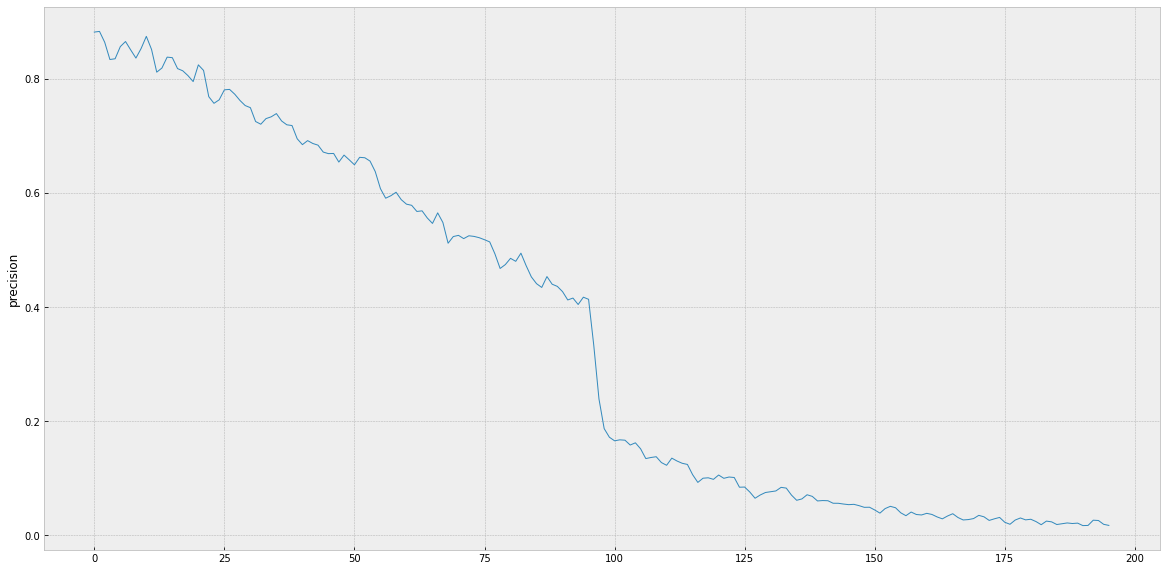

In [138]:
plt.style.use('bmh')

result_df = pd.DataFrame(result)
result_df['precision'].plot(ylabel='precision',linewidth=1,figsize=(20,10))

[]

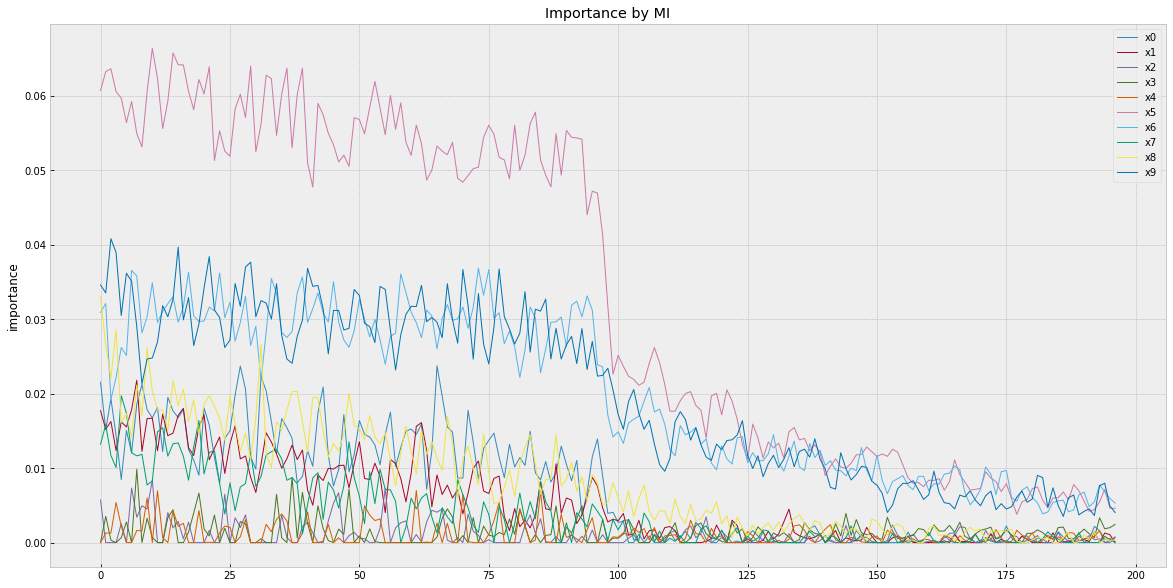

In [139]:
ax = imp_df_mi.plot(ylabel='importance',linewidth=1,figsize=(20,10),legend=True)
ax.set_title("Importance by MI",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

[]

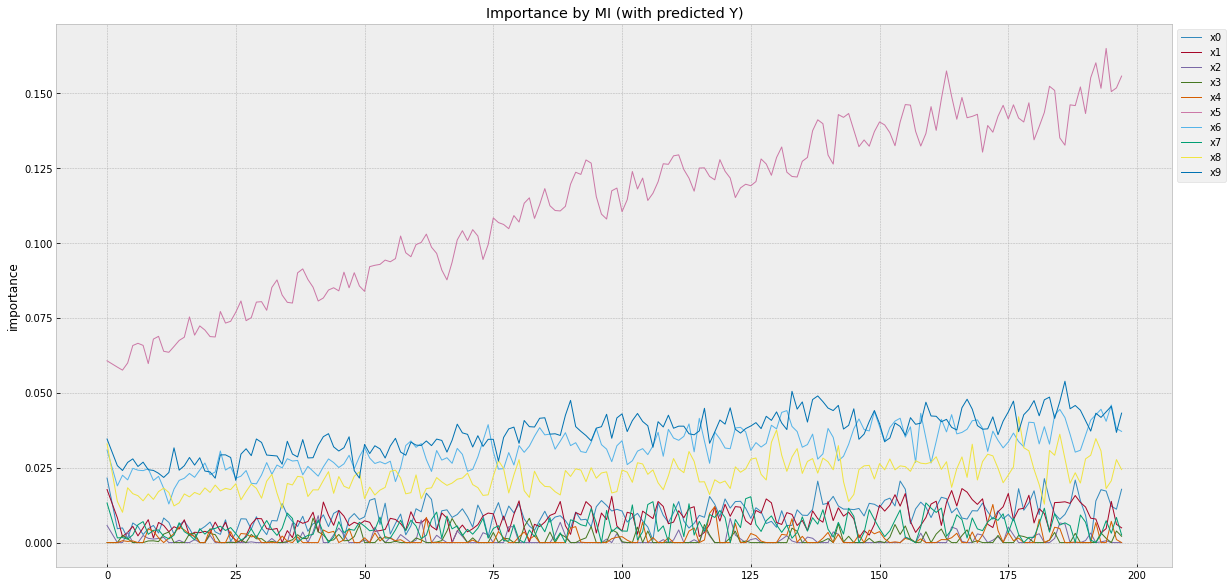

In [140]:
ax = imp_df_mi2.plot(ylabel='importance',linewidth=1,figsize=(20,10),legend=True)
ax.set_title("Importance by MI (with predicted Y)",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()